# Esperimento su LightGBM con features dopo PCA
Binaria

In [1]:
import pandas as pd
from oversampling_binary import split_dataset,apply_smote_binary, train_lightgbm, lightgbm_plot_confusion_matrices

In [2]:
csv_file_path_exp1 = 'C:/Users/frees/Documents/GitHub/UnderwaterClassification/features_extraction/exp1_audio_features_44100_PCA.csv'
df_exp1 = pd.read_csv(csv_file_path_exp1)

In [3]:
df_exp1['File Name'] = df_exp1['File Name'].str[:-4]
# Aggiungi una colonna "Parent" che contiene il prefisso del file per mantenere i segmenti coesi
df_exp1['Parent'] = df_exp1['File Name'].str.extract(r'^(.*?)(?=_seg)')

# Filtra subclass con almeno 10 parent distinti
parent_counts = df_exp1.groupby('Subclass')['Parent'].nunique()
subclasses_to_keep = parent_counts[parent_counts >= 10].index
df_exp1 = df_exp1[df_exp1['Subclass'].isin(subclasses_to_keep)].copy()

print(f"Dimensione totale dopo il filtraggio: {df_exp1.shape[0]} campioni")

Dimensione totale dopo il filtraggio: 49429 campioni


In [4]:
X_train_imputed_exp1, X_val_imputed_exp1, X_test_imputed_exp1, y_train_encoded_exp1, y_val_encoded_exp1, y_test_encoded_exp1 = split_dataset(df_exp1)


Dimensione del set di addestramento: 38789 campioni (78.47%)
Dimensione del set di validazione: 5016 campioni (10.15%)
Dimensione del set di test: 5624 campioni (11.38%)

Distribuzione delle classi nel set di addestramento:
Class
Target        33872
Non-Target     4917
Name: count, dtype: int64

Distribuzione delle classi nel set di validazione:
Class
Target        4403
Non-Target     613
Name: count, dtype: int64

Distribuzione delle classi nel set di test:
Class
Target        4814
Non-Target     810
Name: count, dtype: int64


In [5]:
X_train_resampled_exp1, y_train_resampled_exp1 = apply_smote_binary(
    X_train_imputed_exp1,
    y_train_encoded_exp1,
    k_neighbors=1
)

In [6]:
# Rimuovi le colonne non necessarie per evitare errori nei nomi delle feature
X_val_imputed_exp1 = X_val_imputed_exp1.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')
X_test_imputed_exp1 = X_test_imputed_exp1.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')

In [7]:
lightgbm_model_exp1 = train_lightgbm(X_train_resampled_exp1, y_train_resampled_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

Dimensioni dopo NaN nel set di addestramento: X_train: (67744, 10), y_train: (67744,)
Dimensioni dopo NaN nel set di validazione: X_val: (5016, 10), y_val: (5016,)
Dimensioni dopo NaN nel set di test: X_test: (5624, 10), y_test: (5624,)
Classi nel set di addestramento: [0 1]
Classi nel set di validazione: [0 1]
Classi nel set di test: [0 1]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0     0.9472    0.9951    0.9706       613
           1     0.9993    0.9923    0.9958      4403

    accuracy                         0.9926      5016
   macro avg     0.9733    0.9937    0.9832      5016
weighted avg     0.9929    0.9926    0.9927      5016

Accuratezza sul set di validazione: 0.9926
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0     0.9901    0.9926    0.9914       810
           1     0.9988    0.9983    0.9985      4814

    accuracy                  

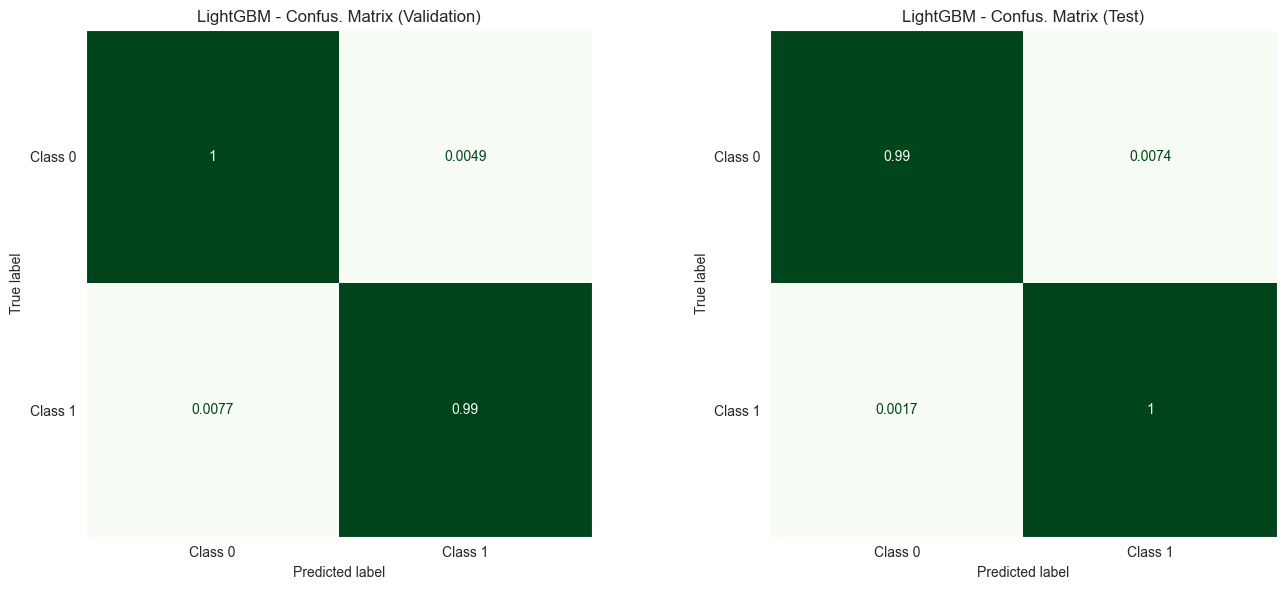

In [8]:
lightgbm_plot_confusion_matrices(lightgbm_model_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

# Esperimento sul Multiclasse

In [1]:
import pandas as pd

from oversampling_multiclass import (
    split_dataset,
    apply_smote_multiclass,
    train_lightgbm_multiclass,
    lightgbm_plot_confusion_matrices
)


In [2]:
csv_file_path_exp1 = 'C:/Users/frees/Documents/GitHub/UnderwaterClassification/features_extraction/exp1_audio_features_44100_PCA.csv'
df_exp1 = pd.read_csv(csv_file_path_exp1)

In [3]:
df_exp1['File Name'] = df_exp1['File Name'].str[:-4]
df_exp1 = df_exp1[df_exp1['Class'] == 'Target'].copy()
# Aggiungi una colonna "Parent" che contiene il prefisso dei file per garantire la coesione dei segmenti
df_exp1['Parent'] = df_exp1['File Name'].str.extract(r'^(.*?)(?=_seg)')

# Filtra le subclass con almeno 10 parent distinti
parent_counts = df_exp1.groupby('Subclass')['Parent'].nunique()
subclasses_to_keep = parent_counts[parent_counts >= 10].index
df_exp1 = df_exp1[df_exp1['Subclass'].isin(subclasses_to_keep)].copy()

print(f"Dimensione totale dopo il filtraggio: {df_exp1.shape[0]} campioni")

Dimensione totale dopo il filtraggio: 43089 campioni


In [4]:
X_train_imputed_exp1, X_val_imputed_exp1, X_test_imputed_exp1, y_train_encoded_exp1, y_val_encoded_exp1, y_test_encoded_exp1, subclass_encoder_exp1 = split_dataset(df_exp1)


Train size: 33872 (78.61%)
Val size:   4403 (10.22%)
Test size:  4814 (11.17%)

Distribuzione di 'Subclass' nel train:
Subclass
Passengership    8830
Tanker           8744
Tug              8213
Cargo            7802
Vessel            283
Name: count, dtype: int64

Distribuzione di 'Subclass' nel val:
Subclass
Passengership    1291
Tanker           1276
Tug               956
Cargo             862
Vessel             18
Name: count, dtype: int64

Distribuzione di 'Subclass' nel test:
Subclass
Passengership    1607
Tanker           1201
Cargo            1007
Tug               993
Vessel              6
Name: count, dtype: int64


In [5]:
# Applica SMOTE
X_train_resampled_exp1, y_train_resampled_exp1 = apply_smote_multiclass(X_train_imputed_exp1, y_train_encoded_exp1, 1)


Class distribution after SMOTE:
1    8830
2    8830
0    8830
3    8830
4    8830
Name: count, dtype: int64


In [6]:
# Rimuovi le colonne non necessarie per evitare errori nei nomi delle feature
X_val_imputed_exp1 = X_val_imputed_exp1.drop(columns=["Class","File Name","Parent","Subclass"], errors='ignore')
X_test_imputed_exp1= X_test_imputed_exp1.drop(columns=["Class","File Name","Parent","Subclass"], errors='ignore')

In [9]:
lightgbm_model_exp1 = train_lightgbm_multiclass(
    X_train_resampled_exp1, y_train_resampled_exp1,
    X_val_imputed_exp1, y_val_encoded_exp1,
    X_test_imputed_exp1, y_test_encoded_exp1
)

Accuratezza (Val) = 0.5585

=== Report - Validation ===
              precision    recall  f1-score   support

           0     0.4482    0.5719    0.5025       862
           1     0.5387    0.4903    0.5134      1291
           2     0.6000    0.5784    0.5890      1276
           3     0.6632    0.6036    0.6320       956
           4     0.6429    1.0000    0.7826        18

    accuracy                         0.5585      4403
   macro avg     0.5786    0.6488    0.6039      4403
weighted avg     0.5662    0.5585    0.5600      4403


Accuratezza (Test) = 0.5283

=== Report - Test ===
              precision    recall  f1-score   support

           0     0.4995    0.4598    0.4788      1007
           1     0.5337    0.4823    0.5067      1607
           2     0.5289    0.5254    0.5272      1201
           3     0.5444    0.6727    0.6018       993
           4     0.4000    1.0000    0.5714         6

    accuracy                         0.5283      4814
   macro avg     0.5013

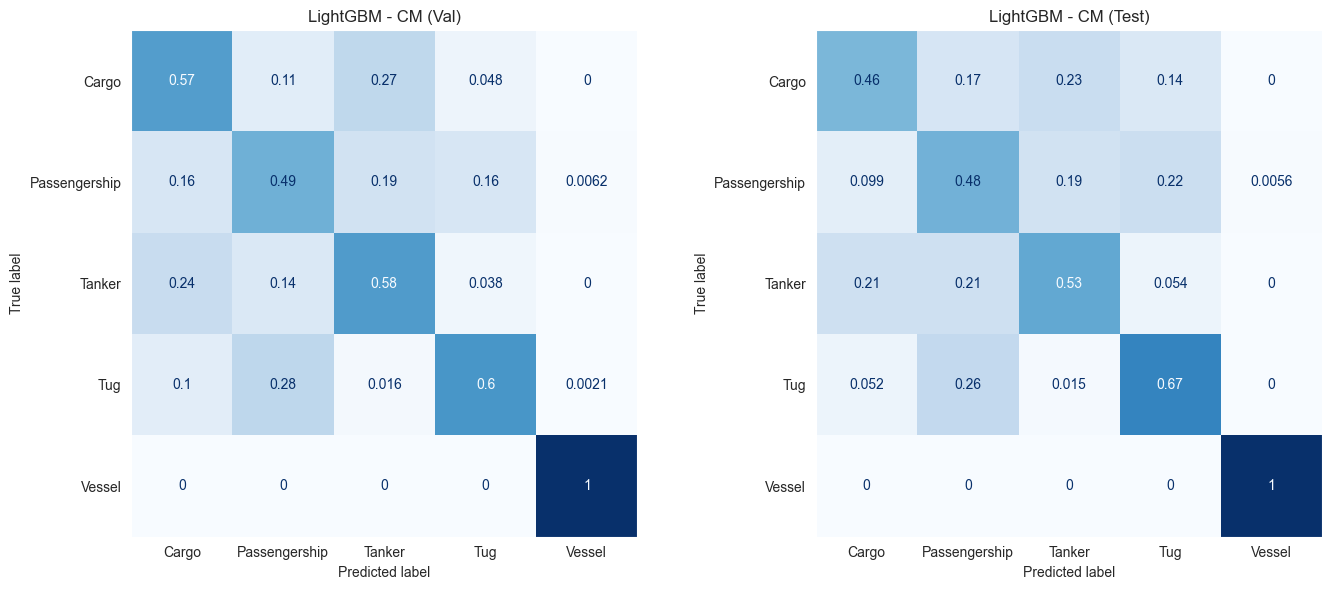

In [8]:
lightgbm_plot_confusion_matrices(
    lightgbm_model_exp1,
    X_val_imputed_exp1, y_val_encoded_exp1,
    X_test_imputed_exp1, y_test_encoded_exp1,subclass_encoder=subclass_encoder_exp1
)